# Two electrons on a ring

## a)

Normalization:
$$
\displaystyle \int_0^{2\pi} \int_0^{2\pi} \Psi(x_1,x_2) \mathrm{d}x_1 \mathrm{d}x_2 = 1 \\
$$

Periodicity:
$$
\Psi(x_1,x_2) = \Psi(x_1+n\pi, x_2+m\pi), \quad n, m \in \mathbb{Z} \\
$$

Antisymmetry:
$$
\Psi(x_1, x_2) = -\Psi(x_2, x_1)
$$

Continuity (?)

## b)
In case of weak interaction, wavefunctions will be "smeared" across the ring, which will minimize the kinetic energy term.

With a large interaction constant, wavefunctions will be more localized, maximizing average distance between electrons.

## c)
$$
(H\Psi)_{i,j} =
    -\frac{1}{2w}(
        (\Psi_{i-1,j} - 2\Psi_{i,j} + \Psi_{i+1,j})
        +
        (\Psi_{i,j-1} - 2\Psi_{i,j} + \Psi_{i,j+1})
    )
    +
    \frac{1}{2}V(w(i-j))
$$

where $w$ is the discretization step

## d-e)

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Hamiltonian etc

In [5]:
N = 100  # spatial resolution
dx = 2 * np.pi / N  # discretization step
eps = 1e-5  # division in potential function


def normalize(psi):
    norm = np.sqrt((psi * psi).sum())
    return psi / norm


def get_V(k, dx, N, eps):
    # k/2sqrt(2-2cos(x1-x2))
    res = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            x = dx * (i - j)
            res[i, j] = k / np.sqrt(2 - 2 * np.cos(x) + eps)
    return res


def T(psi):
    # (-1/2) (d1^2 + d2^2)
    res = np.diff(np.pad(psi, ((1, 1), (0, 0)), mode="wrap"), n=2, axis=0)
    res += np.diff(np.pad(psi, ((0, 0), (1, 1)), mode="wrap"), n=2, axis=1)
    res *= -1 / 2
    return res


def H(psi, V):
    return T(psi) + V * psi


def calc_energy(psi, V):
    return (psi * H(psi, V)).sum()


def init_state(N):
    psi = np.random.normal(loc=0, scale=3, size=(N, N))
    psi = psi - psi.T  # antisymmetrize
    psi = normalize(psi)
    return psi


def opt(psi, n_epochs=50000, n_snapshots=20, lr=3e-4, plot=True):
    energies = []
    history = []
    plot_period = int(n_epochs / n_snapshots)
    for i in range(n_epochs):
        psi -= lr * H(psi, V)
        psi = normalize(psi)
        energy = calc_energy(psi, V)
        energies.append(energy)
        if i % plot_period == 0:
            history.append(psi)

    if plot:
        plt.plot(energies)
        plt.title("E(epoch)")
        plt.matshow(psi * psi)
        plt.title("Final state probabilities")
        plt.show()

    return history


def animate_history(array_list, interval=200, cmap="gray"):
    array_list = [i * i for i in array_list]  # probabilities
    fig, ax = plt.subplots()
    ax.set_title("Probabilities evolution")
    im = ax.imshow(array_list[0], cmap=cmap)

    def update(frame):
        im.set_array(array_list[frame])
        return (im,)

    ani = FuncAnimation(
        fig, update, frames=len(array_list), interval=interval, blit=True
    )
    plt.close(fig)  # prevents displaying the initial plot
    return HTML(ani.to_jshtml())

### Small k

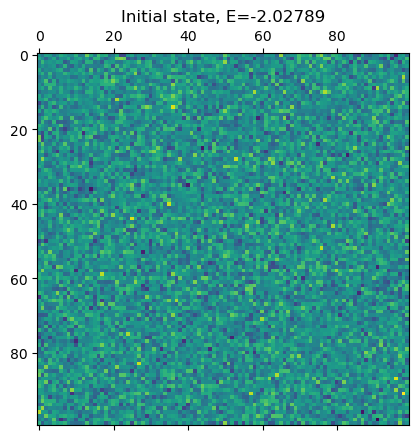

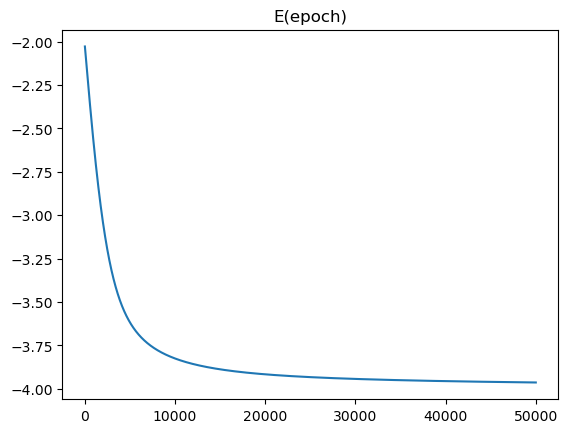

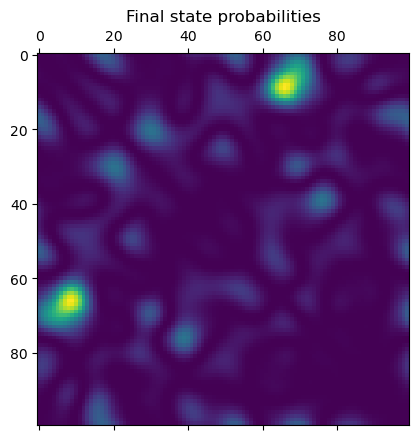

In [9]:
V = get_V(1, dx, N, eps)
psi = init_state(N)
psi = normalize(psi)
energy = calc_energy(psi, V)

plt.matshow(psi)
plt.title(f"Initial state, E={energy:.5f}")
plt.show()

animate_history(opt(psi))

### Large k

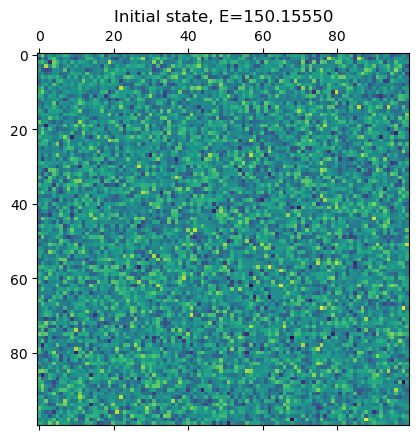

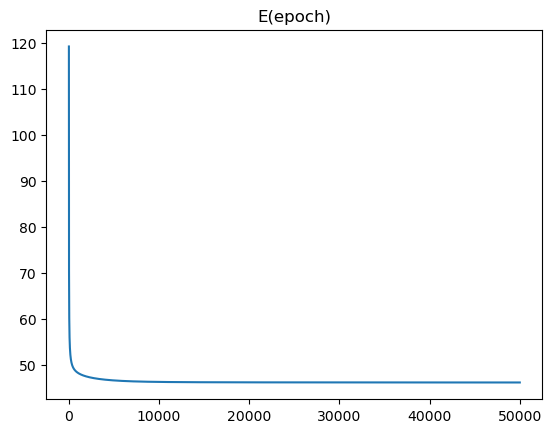

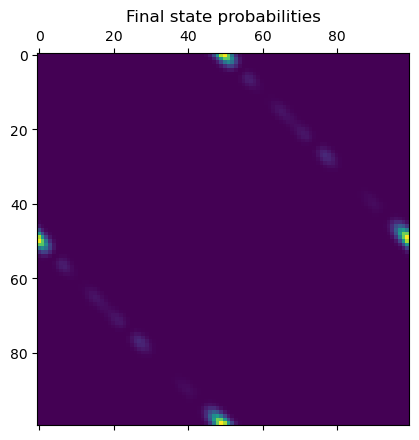

In [7]:
V = get_V(100, dx, N, eps)
psi = init_state(N)
psi = normalize(psi)
energy = calc_energy(psi, V)

plt.matshow(psi)
plt.title(f"Initial state, E={energy:.5f}")
plt.show()

animate_history(opt(psi))

## f)

Slater determinant can't represent the ground state "faithfully", since it doesn't take the interaction into account, failing to describe the peak at $x_2=x_1+\pi$.

## g)

Memory complexity will be proportional to the size of the state vector, which is of size $M^N$.

Assuming $M=2^{10}$:

- N=2: 1 MB
- N=10: ~$10^{18}$ TB
- N=100: ~$10^{288}$ TB